In [1]:
import numpy as np
import math
from scipy.optimize import fsolve
import pvlib

In [2]:
Vmp = 36.6
Imp = 8.20
Voc = 45.3
Isc= 8.84 
Ncell = 72

In [3]:
k = 1.38 * (10**-23)
q = 1.6 * (10**-19)
T = 298.15 # Temp in kelvin
Vt = (k * T) / q
print ("Vt=",Vt)

Vt= 0.02571543749999999


# Q1

In [4]:
def eta_initial():
    n1 = 2*Vmp - Voc
    n2 = Ncell * Vt
    n3 = np.log((Isc - Imp) / Isc)
    n4 = Imp / (Isc - Imp)
    n5 = n1 / (n2 * (n3 + n4))
    #print ( "inieta = ", n5)
    return n5

In [5]:
eta_initial()
eta_ini = eta_initial()
#x= int(ini1)
print (eta_ini)
#print (x)

1.4792263592070725


In [6]:
def Rs_initial():
    n1 = Vmp/Imp
    n2 = (2*Vmp-Voc)/(Isc-Imp)
    n3 = (np.log((Isc-Imp)/Isc)+(Imp/(Isc-Imp)))
    n4 = n2/n3
    n5 = n1-n4
    return n5

In [7]:
Rs_initial()
Rs_ini=Rs_initial()
print ("Rs_initial = ",Rs_ini,"Ohms")

Rs_initial =  0.1840324229353696 Ohms


In [8]:
def Rsh_initial():
    n1 = Isc/(eta_ini*Ncell*Vt)
    #print (n1)
    n2 = (Rs_ini*Isc-Voc)/(eta_ini*Ncell*Vt)
    #print (n2)
    n3 = np.exp(n2)
    #print (n3)
    n4 = n1*n3
    n5 = Rs_ini/n4
    #print (n5)
    n6 = np.sqrt(n5)
    return n6

In [9]:
Rsh_initial()
Rsh_ini=Rsh_initial()
print ("Rsh_initial = ",Rsh_ini,"Ohms")

Rsh_initial =  692.859766596422 Ohms


# Q2

In [10]:
def parameter_function(x):
    eta = x[0]
    Rs  = x[1]
    Rsh = x[2]
    F=np.zeros(np.size(x))
    F[0] = Imp-Isc+(Vmp+Imp*Rs-Isc*Rs)/Rsh+(Isc-(Voc-Isc*Rs)/Rsh )*(np.exp((-Voc+Vmp+Imp*Rs)/(eta*Ncell*Vt ))) 
    F[1] = Imp+Vmp*(((-(-Voc+Isc*Rsh+Isc*Rs)/(eta*Ncell*Vt*Rsh ))* (np.exp((-Voc+Vmp+Imp*Rs)/(eta*Ncell*Vt )))-1/Rsh) /(1+((-Voc+Isc*Rsh+Isc*Rs)/(eta*Ncell*Vt*Rsh))*Rs*(np.exp((-Voc+Vmp+Imp*Rs)/(eta*Ncell*Vt )))+Rs/Rsh ))
    F[2] = 1/Rsh+(((-(-Voc+Isc*Rsh+Isc*Rs)/(eta*Ncell*Vt*Rsh ))* (np.exp((-Voc+Isc*Rs)/(eta*Ncell*Vt )))-1/Rsh) /(1+((-Voc+Isc*Rsh+Isc*Rs)/(eta*Ncell*Vt*Rsh))*Rs*(np.exp((-Voc+Isc*Rs)/(eta*Ncell*Vt )))+Rs/Rsh ))
    return F

x_ini = np.array([eta_ini,Rs_ini,Rsh_ini])
x = fsolve(parameter_function,x_ini)
print (x)

[1.39744677e+00 2.17215097e-01 1.10489487e+03]


In [11]:
eta = x[0]
Rs  = x[1]
Rsh = x[2]
print("eta=",eta)
print("Rs=",Rs)
print("Rsh=",Rsh)

eta= 1.3974467720580908
Rs= 0.21721509749730586
Rsh= 1104.8948729303456


In [12]:
def I_saturation():
    n1=(Voc-Isc*Rs)/Rsh
    n2=Isc-n1
    #print(n2)
    n3=np.exp(-Voc/(eta*Ncell*Vt))
    #print(n3)
    n4=n2*n3
    return n4

In [13]:
I_saturation()
Isat=I_saturation()
print ("Isat  = ",Isat,"Amps")

Isat  =  2.1922584839244864e-07 Amps


In [14]:
def I_photon():
    n1=np.exp(Voc/(eta*Ncell*Vt))
    #print(n1))
    n2=Isat*n1
    #print(n2)
    n3=Voc/Rsh
    #print(n3)
    n4=n2+n3
    return n4

In [15]:
I_photon()
Iph=I_photon()
print ("Iph = ",Iph,"Amps")

Iph =  8.841737886118327 Amps


# Q3

In [16]:
def V_oc(x):
    Voc=x[0]
    F=np.zeros(np.size(x))
    F[0]= Iph-Isat*(np.exp(Voc/(eta*Ncell*Vt)))-Voc/Rsh 
    return F

x=fsolve(V_oc,72*0.6)
Voc=x[0]
print("Voc=",Voc)

Voc= 45.300000000011885


In [17]:
i=[]

def I_sc(x):
    I=x[0]
    F=np.zeros(np.size(x))
    F[0]= -I + Iph - Isat*(np.exp((V+I*Rs) / (eta*Ncell*Vt))-1) - (V+I*Rs)/Rsh
    return F

In [18]:
Vx=np.linspace(0,Voc,num=256)
for V in Vx:
    x = fsolve(I_sc,Iph)
    i.extend(x)
    
print("I=",i)
print("V=",Vx)

I= [8.839999758809823, 8.839838975834416, 8.839678190534592, 8.839517402745182, 8.83935661228929, 8.839195818977442, 8.839035022606707, 8.83887422295973, 8.838713419803714, 8.83855261288932, 8.838391801949493, 8.838230986698198, 8.838070166829082, 8.837909342014019, 8.837748511901566, 8.837587676115312, 8.8374268342521, 8.837265985880121, 8.837105130536889, 8.836944267727052, 8.836783396920062, 8.836622517547669, 8.836461629001251, 8.836300730628937, 8.836139821732532, 8.835978901564237, 8.835817969323113, 8.835657024151313, 8.835496065130028, 8.835335091275173, 8.835174101532724, 8.835013094773775, 8.834852069789193, 8.83469102528394, 8.834529959870949, 8.834368872064596, 8.8342077602737, 8.834046622794004, 8.833885457800168, 8.833724263337142, 8.833563037310961, 8.83340177747887, 8.83324048143875, 8.833079146617807, 8.832917770260424, 8.83275634941519, 8.83259488092097, 8.832433361392024, 8.832271787202023, 8.832110154466978, 8.831948459026911, 8.831786696426262, 8.831624861892873, 8

In [19]:
import matplotlib.pyplot as plt 

Text(36.6040393, 8.201053667922631, 'Pmax')

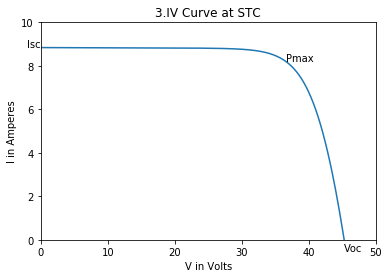

In [20]:
plt.plot(Vx, i)
plt.title('3.IV Curve at STC')
plt.xlabel('V in Volts')
plt.ylabel('I in Amperes')
plt.axis([0, 50, 0, 10])
plt.annotate('Voc',xy=(45.3,0),xytext=(45.3,-0.5))
plt.annotate('Isc',xy=(0,8.839999758809823),xytext=(-2,8.839999758809823))
plt.annotate('Pmax',xy=(36.6040393,8.201053667922631))

In [21]:
p=[]
p=np.multiply(Vx,i)
print("P=",p)

P= [0.00000000e+00 1.57037139e+00 3.14068566e+00 4.71094280e+00
 6.28114282e+00 7.85128570e+00 9.42137145e+00 1.09914001e+01
 1.25613715e+01 1.41312859e+01 1.57011431e+01 1.72709431e+01
 1.88406860e+01 2.04103718e+01 2.19800004e+01 2.35495719e+01
 2.51190862e+01 2.66885433e+01 2.82579432e+01 2.98272860e+01
 3.13965716e+01 3.29658000e+01 3.45349712e+01 3.61040852e+01
 3.76731420e+01 3.92421416e+01 4.08110839e+01 4.23799690e+01
 4.39487969e+01 4.55175675e+01 4.70862808e+01 4.86549368e+01
 5.02235355e+01 5.17920769e+01 5.33605610e+01 5.49289876e+01
 5.64973569e+01 5.80656688e+01 5.96339232e+01 6.12021202e+01
 6.27702597e+01 6.43383417e+01 6.59063660e+01 6.74743328e+01
 6.90422420e+01 7.06100934e+01 7.21778871e+01 7.37456230e+01
 7.53133011e+01 7.68809212e+01 7.84484834e+01 8.00159875e+01
 8.15834334e+01 8.31508212e+01 8.47181506e+01 8.62854216e+01
 8.78526341e+01 8.94197879e+01 9.09868829e+01 9.25539191e+01
 9.41208961e+01 9.56878140e+01 9.72546724e+01 9.88214713e+01
 1.00388210e+02 1.019

<function matplotlib.pyplot.show(*args, **kw)>

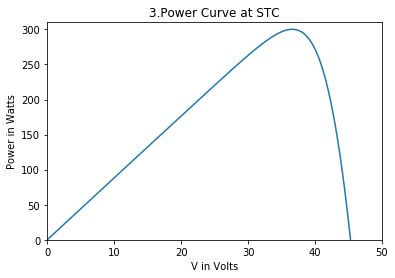

In [22]:
plt.plot(Vx, p)
plt.axis([0, 50, 0, 310])
plt.title('3.Power Curve at STC')
plt.xlabel('V in Volts')
plt.ylabel('Power in Watts')
plt.show

In [23]:
Voc=np.amax(Vx)
Isc=np.amax(i)
Pmax=np.amax(p)
print("Voc=",Voc)
print("Isc=",Isc)
print("Pmax=",Pmax)
print("Rs=",Rs)
print("Rsh=",Rsh)
print("Iph=",Iph)
print("Isat=",Isat)

Voc= 45.300000000011885
Isc= 8.839999758809823
Pmax= 300.1199710523156
Rs= 0.21721509749730586
Rsh= 1104.8948729303456
Iph= 8.841737886118327
Isat= 2.1922584839244864e-07


In [24]:
FF=(Pmax/(Voc*Isc))
print("Fill Factor=",FF)

Fill Factor= 0.7494530661370086


# Q4

In [25]:
Rs=2*Rs
print("Rs1=",Rs)

Rs1= 0.4344301949946117


In [26]:
x=fsolve(V_oc,72*0.6)
Voc1=x[0]
print("Voc=",Voc1)

Voc= 45.300000000011885


In [27]:
i1=[]
Vx=np.linspace(0,Voc1,num=256)
for V in Vx:
    x = fsolve(I_sc,Iph)
    i1.extend(x)
    
print("I=",i1)
print("V=",Vx)

I= [8.83826204956851, 8.838101262233726, 8.837940470021087, 8.83777967258406, 8.837618869551495, 8.837458060525876, 8.837297245081446, 8.837136422762201, 8.836975593079742, 8.836814755510975, 8.836653909495642, 8.836493054433683, 8.836332189682413, 8.836171314553484, 8.83601042830965, 8.835849530161292, 8.835688619262688, 8.835527694708045, 8.83536675552721, 8.835205800681114, 8.835044829056875, 8.834883839462544, 8.834722830621496, 8.834561801166416, 8.834400749632847, 8.8342396744523, 8.834078573944856, 8.833917446311256, 8.833756289624413, 8.833595101820343, 8.83343388068843, 8.833272623861019, 8.833111328802248, 8.83294999279611, 8.832788612933646, 8.832627186099245, 8.832465708955958, 8.832304177929778, 8.8321425891928, 8.831980938645177, 8.831819221895815, 8.831657434241663, 8.831495570645577, 8.831333625712562, 8.83117159366437, 8.83100946831226, 8.83084724302785, 8.830684910711875, 8.830522463760742, 8.830359894030703, 8.830197192799488, 8.8300343507252, 8.82987135780231, 8.829

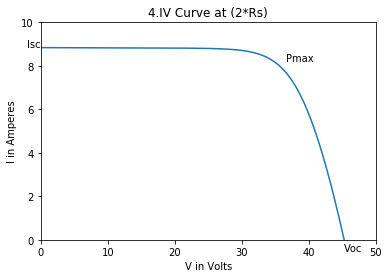

In [28]:
markers_on = [206]
plt.plot(Vx, i1,'-',markevery=206)
plt.title('4.IV Curve at (2*Rs)')
plt.xlabel('V in Volts')
plt.ylabel('I in Amperes')
plt.axis([0, 50, 0, 10])
plt.annotate('Voc',xy=(45.3,0),xytext=(45.3,-0.5))
plt.annotate('Isc',xy=(0,8.839999758809823),xytext=(-2,8.839999758809823))
plt.annotate('Pmax',xy=(36.6040393,8.201053667922631))
plt.show()

In [29]:
p1=[]
p1=np.multiply(Vx,i1)
print("P=",p1)


P= [0.00000000e+00 1.57006269e+00 3.14006826e+00 4.71001670e+00
 6.27990800e+00 7.84974216e+00 9.41951918e+00 1.09892391e+01
 1.25589018e+01 1.41285074e+01 1.56980558e+01 1.72675470e+01
 1.88369811e+01 2.04063580e+01 2.19756777e+01 2.35449402e+01
 2.51141455e+01 2.66832936e+01 2.82523845e+01 2.98214182e+01
 3.13903946e+01 3.29593137e+01 3.45281756e+01 3.60969802e+01
 3.76657274e+01 3.92344174e+01 4.08030500e+01 4.23716252e+01
 4.39401431e+01 4.55086035e+01 4.70770064e+01 4.86453519e+01
 5.02136399e+01 5.17818704e+01 5.33500432e+01 5.49181584e+01
 5.64862160e+01 5.80542158e+01 5.96221579e+01 6.11900421e+01
 6.27578684e+01 6.43256367e+01 6.58933470e+01 6.74609991e+01
 6.90285930e+01 7.05961286e+01 7.21636058e+01 7.37310245e+01
 7.52983845e+01 7.68656857e+01 7.84329280e+01 8.00001112e+01
 8.15672352e+01 8.31342997e+01 8.47013046e+01 8.62682497e+01
 8.78351347e+01 8.94019593e+01 9.09687234e+01 9.25354266e+01
 9.41020686e+01 9.56686491e+01 9.72351677e+01 9.88016240e+01
 1.00368018e+02 1.019

In [30]:
Voc1=np.amax(Vx)
Isc1=np.amax(i1)
Pmax1=np.amax(p1)
print("Voc=",Voc1)
print("Isc=",Isc1)
print("Pmax=",Pmax1)
print("Rs=",Rs)
print("Rsh=",Rsh)
print("Iph=",Iph)
print("Isat=",Isat)
FF1=(Pmax1/(Voc1*Isc1))
print("Fill Factor=",FF1)
index=np.where(p1==np.amax(p1))
print(index)
print("point=",Vx[index])
print("point1=",i1[206])

Voc= 45.300000000011885
Isc= 8.83826204956851
Pmax= 285.6049761785241
Rs= 0.4344301949946117
Rsh= 1104.8948729303456
Iph= 8.841737886118327
Isat= 2.1922584839244864e-07
Fill Factor= 0.7133467615741372
(array([197], dtype=int64),)
point= [34.99647059]
point1= 7.697174802978821


# Q4 % degradation

In [31]:
deltaPmax=((Pmax-Pmax1)/Pmax)
print ("deltaPmax=",deltaPmax*100,"%")

deltaPmax= 4.836397532259283 %


In [32]:
deltaFF=((FF-FF1)/FF)
print ("deltaFF=",deltaFF*100,"%")

deltaFF= 4.817687216756371 %


# Q5

In [33]:
Rs=0.21721509749730586 # Q3 as baseline
Rsh2=np.linspace(50,Rsh,num=10)
print("Rsh2=",Rsh2)


Rsh2= [  50.          167.21054144  284.42108287  401.63162431  518.84216575
  636.05270718  753.26324862  870.47379006  987.68433149 1104.89487293]


In [34]:
voc=[]
for Rsh in Rsh2:
    x=fsolve(V_oc,72*0.6)
    voc.append(x)

print("voc=",voc)
    

voc= [array([45.03404425]), array([45.23163007]), array([45.26502944]), array([45.27882288]), array([45.28635671]), array([45.29110392]), array([45.29436928]), array([45.29675297]), array([45.29856959]), array([45.3])]


In [35]:
i2=[]
p2=[]
Isc_2=[]
Voc_2=[]
Pmax_2=[]
FF_2=[]
Vx=np.linspace(0,Voc,num=256)
for Rsh in Rsh2:
    for V in Vx:
        x = fsolve(I_sc,Iph)
        i2.extend(x)
    y=0
    Voc2=np.amax(Vx)
    #print("Voc=",Voc2)
    Isc2=np.amax(i2)
    #print("Isc=",Isc2)
    p2=np.multiply(Vx,i2)
    y=p2.size
    print(y)
    Pmax2=np.amax(p2)
    #print("Pmax=",Pmax2)
    FF2=(Pmax2/(Voc2*Isc2))
    #print("FF=",FF2)
    Isc_2.append(Isc2)
    Voc_2.append(Voc2)
    Pmax_2.append(Pmax2)
    FF_2.append(FF2)
    i2.clear()
print("Isc_2=",Isc_2)
print("Pmax_2=",Pmax_2)
print("FF_2=",FF_2)

256
256
256
256
256
256
256
256
256
256
Isc_2= [8.803492616151132, 8.830266674466701, 8.834990278615535, 8.83695833816382, 8.83803756944408, 8.838719179280146, 8.839188728255229, 8.839531857893771, 8.83979356563181, 8.839999758809823]
Pmax_2= [274.7905873572535, 293.3429091464801, 296.6326349495676, 298.0028773489614, 298.75418119045213, 299.22864523658063, 299.5554785733588, 299.7943081642995, 299.9764605598478, 300.1199710523156]
FF_2= [0.6890466824296925, 0.7333369587844535, 0.7411645718291124, 0.7444224258862354, 0.7462080790554873, 0.7473355271658151, 0.7481120637379748, 0.748679455434624, 0.7491121679124766, 0.7494530661370086]


In [36]:
Voc_delta=[]
Isc_delta=[]
Pmax_delta=[]
FF_delta=[]
for i in range(10):
    Vocdelta=((Voc-voc[i])/Voc)*100
    Iscdelta=((Isc-Isc_2[i])/Isc)*100
    Pmaxdelta=((Pmax-Pmax_2[i])/Pmax)*100
    FFdelta=((FF-FF_2[i])/FF)*100
    Voc_delta.extend(Vocdelta)
    Isc_delta.append(Iscdelta)
    Pmax_delta.append(Pmaxdelta)
    FF_delta.append(FFdelta)

print(Voc_delta)
print(Isc_delta)
print(Pmax_delta)
print(FF_delta)

[0.5870987861035837, 0.150926988634585, 0.07719771143410135, 0.046748601656510166, 0.030117635391646375, 0.01963814780375637, 0.012429841174052674, 0.007167840189470175, 0.0031576273339422567, 0.0]
[0.41297673817590286, 0.11010276706650056, 0.05666832953581118, 0.034405211866345944, 0.022196712887778493, 0.014486194169868339, 0.009174554035319077, 0.005292996932327174, 0.0023325020773573724, 0.0]
[8.439752811600384, 2.258117606126958, 1.1619806874298537, 0.705415802864087, 0.45508129868017655, 0.2969898379670217, 0.18808894222449646, 0.10851090211498433, 0.0478177083532928, 0.0]
[8.060062255622706, 2.1503824696620666, 1.1059390750935831, 0.6712415330693299, 0.43298069327374017, 0.2825445737527183, 0.17893080429250463, 0.10322336879240283, 0.04548626724407348, 0.0]


Text(0.5, 0, 'R in ohms')

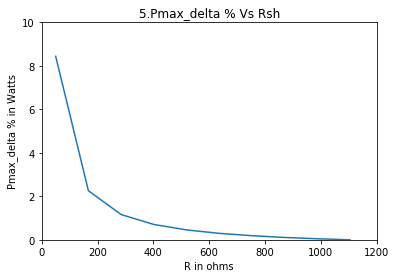

In [37]:
plt.plot(Rsh2, Pmax_delta)
plt.axis([0, 1200, 0, 10])
plt.title('5.Pmax_delta % Vs Rsh')
plt.ylabel('Pmax_delta % in Watts')
plt.xlabel('R in ohms')

Text(0.5, 0, 'R in ohms')

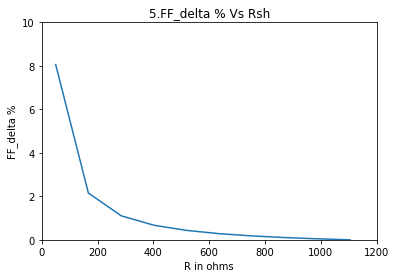

In [38]:
plt.plot(Rsh2, FF_delta)
plt.axis([0, 1200, 0, 10])
plt.title('5.FF_delta % Vs Rsh')
plt.ylabel('FF_delta %')
plt.xlabel('R in ohms')

Text(0.5, 0, 'R in ohms')

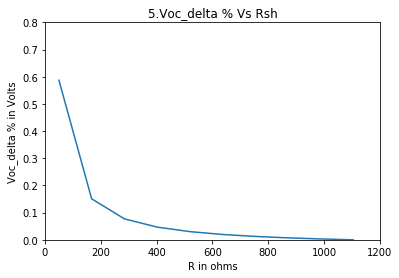

In [39]:
plt.plot(Rsh2, Voc_delta)
plt.axis([0, 1200, 0, 0.8])
plt.title('5.Voc_delta % Vs Rsh')
plt.ylabel('Voc_delta % in Volts')
plt.xlabel('R in ohms')

Text(0.5, 0, 'R in ohms')

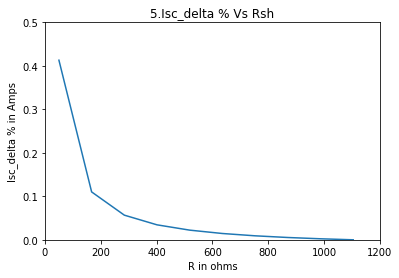

In [40]:
plt.plot(Rsh2, Isc_delta)
plt.axis([0, 1200, 0, 0.5])
plt.title('5.Isc_delta % Vs Rsh')
plt.ylabel('Isc_delta % in Amps')
plt.xlabel('R in ohms')

# Q5.2

In [41]:
Rsh3= 10*Rsh
print(Rsh3)

11048.948729303456


In [42]:
Rsh = Rsh3
x=fsolve(V_oc,72*0.6)
Voc=x[0]
print("Voc=",Voc)

Voc= 45.310825350231035


In [43]:
Rs=0.21721509749730586
i3=[]
Vx=np.linspace(0,Voc,num=256)
for V in Vx:
    x = fsolve(I_sc,Iph)
    i3.extend(x)

C:\Users\Makrand\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [44]:
p3=[]
p3=np.multiply(Vx,i3)
Pmax3=np.amax(p3)
print("Pmax3=",Pmax3)


Pmax3= 301.2088124864898


In [45]:
P_delta=[]
for i in range(256):
    Pdelta=(p3[i]-p[i])
    P_delta.append(Pdelta)
    

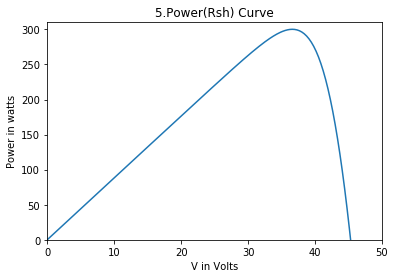

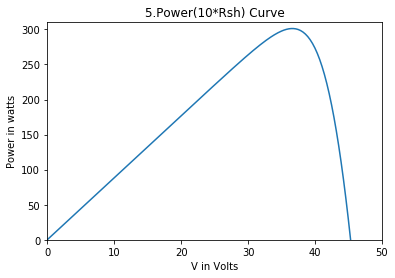

In [46]:
plt.plot(Vx,p)
plt.axis([0, 50, 0, 310])
plt.title('5.Power(Rsh) Curve')
plt.ylabel('Power in watts')
plt.xlabel("V in Volts")
plt.show()

plt.plot(Vx,p3)
plt.axis([0, 50, 0, 310])
plt.title('5.Power(10*Rsh) Curve')
plt.ylabel('Power in watts')
plt.xlabel("V in Volts")
plt.show()
